In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-dataset/datasets/contacts.tsv
/kaggle/input/airbnb-dataset/datasets/searches.tsv


## Market Analysis in Dublin

This data project has been used as a take-home assignment in the recruitment process for the data science positions at Airbnb.
Assignment
A new city manager for Airbnb has started in Dublin and wants to better understand:

what guests are searching for in Dublin,
which inquiries hosts tend to accept.
Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
what other data would be useful to have to deepen the analysis and understanding.
Data Description
There are 2 datasets

searches.tsv - Contains a row for each set of searches that a user does for Dublin
contacts.tsv - Contains a row for every time that an assigned visitor makes an inquiry for a stay in a listing in Dublin
searches dataset contains the following columns:

ds - Date of the search
id_user - Alphanumeric user_id
ds_checkin - Date stamp of the check-in date of the search
ds_checkout - Date stamp of the check-out date of the search
n_searches - Number of searches in the search set
n_nights - The number of nights the search was for
n_guests_min - The minimum number of guests selected in a search set
n_guests_max - The maximum number of guests selected in a search set
origin_country - The country the search was from
filter_price_min - The value of the lower bound of the price filter, if the user used it
filter_price_max - The value of the upper bound of the price filter, if the user used it
filter_room_types - The room types that the user filtered by, if the user used the room_types filter
filter_neighborhoods - The neighborhoods types that the user filtered by, if the user used the neighborhoods filter
contacts dataset contains the following columns:

id_guest - Alphanumeric user_id of the guest making the inquiry
id_host - Alphanumeric user_id of the host of the listing to which the inquiry is made
id_listing - Alphanumeric identifier for the listing to which the inquiry is made
ts_contact_at - UTC timestamp of the moment the inquiry is made.
ts_reply_at - UTC timestamp of the moment the host replies to the inquiry, if so
ts_accepted_at - UTC timestamp of the moment the host accepts the inquiry, if so
ts_booking_at - UTC timestamp of the moment the booking is made, if so
ds_checkin - Date stamp of the check-in date of the inquiry
ds_checkout - Date stamp of the check-out date of the inquiry
n_guests - The number of guests the inquiry is for
n_messages - The total number of messages that were sent around this inquiry

In [7]:
contacts_df= pd.read_table("/kaggle/input/airbnb-dataset/datasets/contacts.tsv")
searchs_df =pd.read_table("/kaggle/input/airbnb-dataset/datasets/searches.tsv")

In [8]:
contacts_df.head()

id_guest                               id_host  \
0  000dfad9-459b-4f0b-8310-3d6ab34e4f57  13bb24b8-d432-43a2-9755-5ea11b43bb69   
1  00197051-c6cb-4c3a-99e9-86615b819874  46aa3897-9c00-4d76-ac66-a307593d0675   
2  0027538e-aa9e-4a02-8979-b8397e5d4cba  6bbb88ca-db66-48c5-9c4b-862f7706284a   
3  0027538e-aa9e-4a02-8979-b8397e5d4cba  8772bc85-a9b7-4d85-a52d-41f3620c2912   
4  0027538e-aa9e-4a02-8979-b8397e5d4cba  ac162061-55e2-4072-ac91-2e080f9581f2   

                             id_listing          ts_contact_at  \
0  21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370  2014-10-04 16:26:28.0   
1  fb5ed09a-9848-4f2c-b2ef-34deb62164fb  2014-11-04 09:10:03.0   
2  d3871da6-8012-4dc4-b508-c91f2c10c297  2014-10-10 12:02:50.0   
3  0d9b5583-8053-4b67-adfe-8c29eb12efed  2014-10-10 15:23:53.0   
4  ec68e0af-b0f2-42c7-b6f8-d41061c083ff  2014-10-10 15:22:26.0   

             ts_reply_at         ts_accepted_at          ts_booking_at  \
0  2014-10-04 16:26:28.0  2014-10-04 16:26:28.0  2014-10-04 16:26:28.0   
1  2014-11-04 09:45:50.0  2014-11-04 09:45:50.0  2014-11-04 12:20:46.0   
2  2014-10-10 15:07:01.0                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4  2014-10-10 15:24:26.0  2014-10-10 15:24:26.0  2014-10-10 15:52:42.0   

   ds_checkin ds_checkout  n_guests  n_messages  
0  2014-10-13  2014-10-15         2          13  
1  2014-11-27  2014-11-30         1          10  
2  2014-10-17  2014-10-19         2           3  
3  2014-10-17  2014-10-19         2           2  
4  2014-10-17  2014-10-19         2          14

In [9]:
searchs_df.head()

ds                               id_user  ds_checkin ds_checkout  \
0  2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-12   
1  2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-19   
2  2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5         NaN         NaN   
3  2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5  2014-11-08  2014-11-10   
4  2014-10-01  001c04f0-5a94-4ee0-bf5d-3591265256de         NaN         NaN   

   n_searches  n_nights  n_guests_min  n_guests_max origin_country  \
0          16       3.0             2             2             IE   
1           3      10.0             1             2             IE   
2           1       NaN             1             1             GB   
3          11       2.0             1             2             GB   
4           1       NaN             1             1             IE   

   filter_price_min  filter_price_max  \
0               0.0              67.0   
1               0.0              67.0   
2               NaN               NaN   
3               NaN               NaN   
4               NaN               NaN   

                                   filter_room_types filter_neighborhoods  
0  ,Entire home/apt,Entire home/apt,Private room,...                  NaN  
1                                                NaN                  NaN  
2                                                NaN                  NaN  
3                                   ,Entire home/apt                  NaN  
4                                                NaN                  NaN

In [12]:
from ydata_profiling import ProfileReport
profile1 = ProfileReport(searchs_df, title="Profiling Report")
profile2 = ProfileReport(contacts_df, title="Profiling Report 2 - Contacts")


In [14]:
profile1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
searchs_df.head(5)

ds                               id_user  ds_checkin ds_checkout  \
0  2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-12   
1  2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-19   
2  2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5         NaN         NaN   
3  2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5  2014-11-08  2014-11-10   
4  2014-10-01  001c04f0-5a94-4ee0-bf5d-3591265256de         NaN         NaN   

   n_searches  n_nights  n_guests_min  n_guests_max origin_country  \
0          16       3.0             2             2             IE   
1           3      10.0             1             2             IE   
2           1       NaN             1             1             GB   
3          11       2.0             1             2             GB   
4           1       NaN             1             1             IE   

   filter_price_min  filter_price_max  \
0               0.0              67.0   
1               0.0              67.0   
2               NaN               NaN   
3               NaN               NaN   
4               NaN               NaN   

                                   filter_room_types filter_neighborhoods  
0  ,Entire home/apt,Entire home/apt,Private room,...                  NaN  
1                                                NaN                  NaN  
2                                                NaN                  NaN  
3                                   ,Entire home/apt                  NaN  
4                                                NaN                  NaN

In [29]:
# Filter neighborhoods has highest missing value percentage i.e 96%. So, we will drop the column from the dataframe
searchs_df=searchs_df.drop(columns=['filter_neighborhoods'])

KeyError: "['filter_neighborhoods'] not found in axis"

In [30]:
searchs_df.head()

ds                               id_user  ds_checkin ds_checkout  \
0  2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-12   
1  2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-19   
2  2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5         NaN         NaN   
3  2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5  2014-11-08  2014-11-10   
4  2014-10-01  001c04f0-5a94-4ee0-bf5d-3591265256de         NaN         NaN   

   n_searches  n_nights  n_guests_min  n_guests_max origin_country  \
0          16       3.0             2             2             IE   
1           3      10.0             1             2             IE   
2           1       NaN             1             1             GB   
3          11       2.0             1             2             GB   
4           1       NaN             1             1             IE   

   filter_price_min  filter_price_max  \
0               0.0              67.0   
1               0.0              67.0   
2               NaN               NaN   
3               NaN               NaN   
4               NaN               NaN   

                                   filter_room_types  
0  ,Entire home/apt,Entire home/apt,Private room,...  
1                                                NaN  
2                                                NaN  
3                                   ,Entire home/apt  
4                                                NaN

In [31]:
import seaborn as sns
import matplotlib as plt

In [33]:
searchs_df.dtypes

ds                    object
id_user               object
ds_checkin            object
ds_checkout           object
n_searches             int64
n_nights             float64
n_guests_min           int64
n_guests_max           int64
origin_country        object
filter_price_min     float64
filter_price_max     float64
filter_room_types     object
dtype: object

In [42]:
# Converting ds, ds_checkin, ds_checkout from object to datetime datatype
searchs_df['ds']=pd.to_datetime(searchs_df['ds'])
searchs_df['ds_checkin']=pd.to_datetime(searchs_df['ds_checkin'])
searchs_df['ds_checkout']=pd.to_datetime(searchs_df['ds_checkout'])
searchs_df.head(5)


ds                               id_user ds_checkin ds_checkout  \
0 2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148 2014-10-09  2014-10-12   
1 2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148 2014-10-09  2014-10-19   
2 2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5        NaT         NaT   
3 2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5 2014-11-08  2014-11-10   
4 2014-10-01  001c04f0-5a94-4ee0-bf5d-3591265256de        NaT         NaT   

   n_searches  n_nights  n_guests_min  n_guests_max origin_country  \
0          16       3.0             2             2             IE   
1           3      10.0             1             2             IE   
2           1       NaN             1             1             GB   
3          11       2.0             1             2             GB   
4           1       NaN             1             1             IE   

   filter_price_min  filter_price_max  \
0               0.0              67.0   
1               0.0              67.0   
2               NaN               NaN   
3               NaN               NaN   
4               NaN               NaN   

                                   filter_room_types  
0  ,Entire home/apt,Entire home/apt,Private room,...  
1                                                NaN  
2                                                NaN  
3                                   ,Entire home/apt  
4                                                NaN

In [46]:
#Creating new feature know as Length of prepartion: How soon they want the room ?
searchs_df['length_prep']= searchs_df['ds_checkin']- searchs_df['ds']

In [47]:
searchs_df.head()

ds                               id_user ds_checkin ds_checkout  \
0 2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148 2014-10-09  2014-10-12   
1 2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148 2014-10-09  2014-10-19   
2 2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5        NaT         NaT   
3 2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5 2014-11-08  2014-11-10   
4 2014-10-01  001c04f0-5a94-4ee0-bf5d-3591265256de        NaT         NaT   

   n_searches  n_nights  n_guests_min  n_guests_max origin_country  \
0          16       3.0             2             2             IE   
1           3      10.0             1             2             IE   
2           1       NaN             1             1             GB   
3          11       2.0             1             2             GB   
4           1       NaN             1             1             IE   

   filter_price_min  filter_price_max  \
0               0.0              67.0   
1               0.0              67.0   
2               NaN               NaN   
3               NaN               NaN   
4               NaN               NaN   

                                   filter_room_types length_prep  
0  ,Entire home/apt,Entire home/apt,Private room,...      8 days  
1                                                NaN      8 days  
2                                                NaN         NaT  
3                                   ,Entire home/apt     38 days  
4                                                NaN         NaT

In [48]:
searchs_df.describe()

ds                     ds_checkin  \
count                          35737                          23888   
mean   2014-10-07 14:32:34.478551552  2014-11-27 22:42:10.609511168   
min              2014-10-01 00:00:00            2014-10-01 00:00:00   
25%              2014-10-04 00:00:00            2014-10-17 00:00:00   
50%              2014-10-08 00:00:00            2014-11-03 00:00:00   
75%              2014-10-11 00:00:00            2014-12-13 00:00:00   
max              2014-10-14 00:00:00            2016-06-02 00:00:00   
std                              NaN                            NaN   

                         ds_checkout    n_searches      n_nights  \
count                          23888  35737.000000  23888.000000   
mean   2014-12-05 14:50:57.468184832      9.206565      7.672765   
min              2014-10-02 00:00:00      1.000000      0.000000   
25%              2014-10-23 00:00:00      1.000000      2.000000   
50%              2014-11-09 00:00:00      4.000000      3.000000   
75%              2014-12-24 00:00:00     10.000000      5.000000   
max              2016-08-17 00:00:00    448.000000    399.000000   
std                              NaN     17.348746     21.557614   

       n_guests_min  n_guests_max  filter_price_min  filter_price_max  \
count  35737.000000  35737.000000      13322.000000      1.332200e+04   
mean       1.742955      2.105857          8.470200      9.019063e+07   
min        1.000000      1.000000          0.000000      9.000000e+00   
25%        1.000000      1.000000          0.000000      8.600000e+01   
50%        1.000000      2.000000          0.000000      1.390000e+02   
75%        2.000000      2.000000          0.000000      3.010000e+02   
max       16.000000     16.000000       1250.000000      1.073742e+09   
std        1.460440      1.817358         53.987679      2.978482e+08   

                      length_prep  
count                       23888  
mean   51 days 08:11:53.730743469  
min             -1 days +00:00:00  
25%              10 days 00:00:00  
50%              26 days 00:00:00  
75%              67 days 00:00:00  
max             604 days 00:00:00  
std    65 days 18:56:19.491940518

## Insight_1 
From the table we can say guests are looking for smaller accomdations as the n_guests_min & n_guests_max lies between 1 & 2 for 75% of the data points.


In [50]:
#Calculate skewness in searchs dataset

display(searchs_df.skew(axis = 0, numeric_only = True, skipna = True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

All numeric columns have a Fisher-Pearson coefficient value greater than 1. This results in a positive skewness. We will apply log transformation to reduce skewness.

In [51]:
# Columns to apply log transformation
columns_to_transform = ['n_searches', 'n_nights', 'n_guests_min', 'n_guests_max', 'filter_price_min', 'filter_price_max']

# Apply log transformation
searchs_df[columns_to_transform] = searchs_df[columns_to_transform].apply(np.log1p)


In [52]:
display(searchs_df.skew(axis=0, numeric_only= True, skipna= True))

n_searches          0.791423
n_nights            1.795311
n_guests_min        1.751904
n_guests_max        1.350444
filter_price_min    4.033222
filter_price_max    2.842100
dtype: float64

We have succesfully reduced the posiitive skewness for the features by applying Log transformation.

## Distribution Graphs

AttributeError: module 'matplotlib' has no attribute 'show'

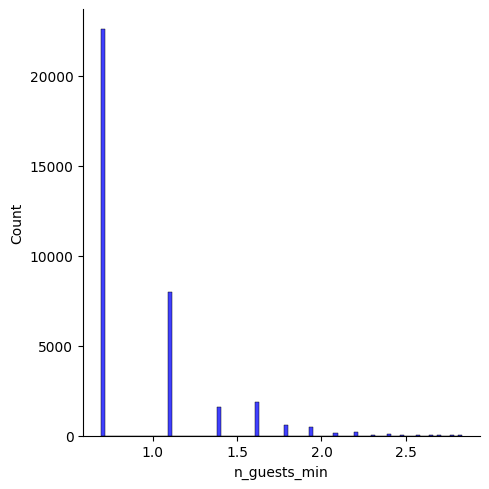

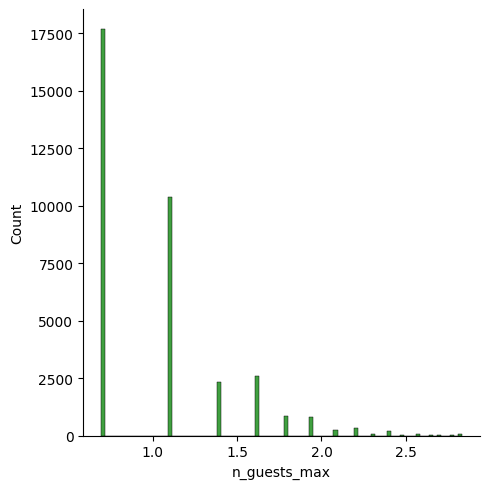

In [54]:
#Distribution plot of n_guests_min and n_guests_max
sns.displot(searchs_df, x = 'n_guests_min', color = 'blue')
sns.displot(searchs_df, x = 'n_guests_max', color = 'green')
plt.show()

## Insight_1 Proof: 
**The distributions of both options are comparable, with a preference for room for 1 as the most popular choice, followed closely by room for 2.**

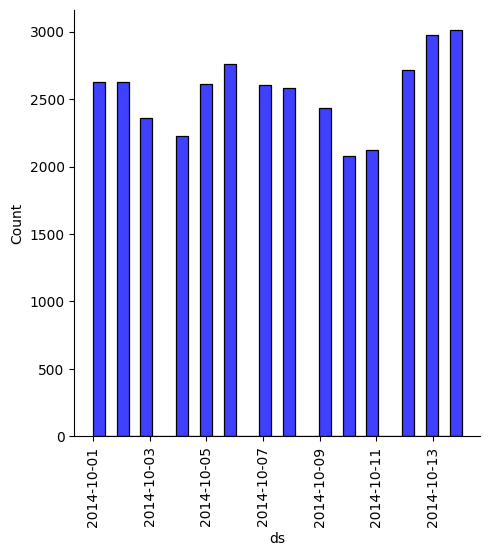

In [57]:
#When were searches conducted

ax = sns.displot(searchs_df, x = 'ds', color = 'blue')
ax.set_xticklabels(rotation=90)
#[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

Notice, all date searches were between October 1st to October 14th. 

AttributeError: module 'matplotlib' has no attribute 'show'

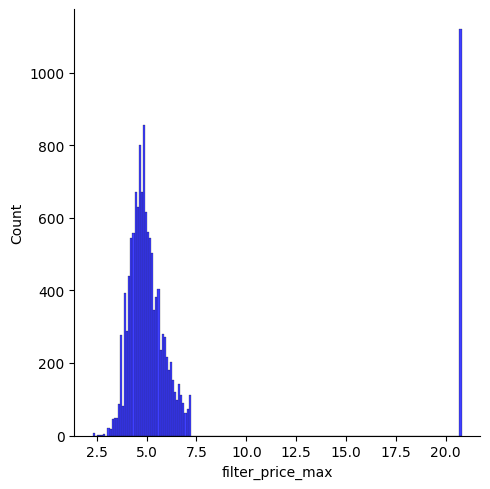

In [64]:
#Distribution of filter_price_max of searches

#Removing the set upper limit
searches_maxprice_removed = searchs_df[searchs_df['filter_price_max'] <= 600]

#Distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed["filter_price_max"], color = 'blue')
plt.show()

The line after value 20 seeems to be a outlier. So we will be the ignoring it while analysing the graph. 

9.396423874415872 % 



AttributeError: module 'matplotlib' has no attribute 'show'

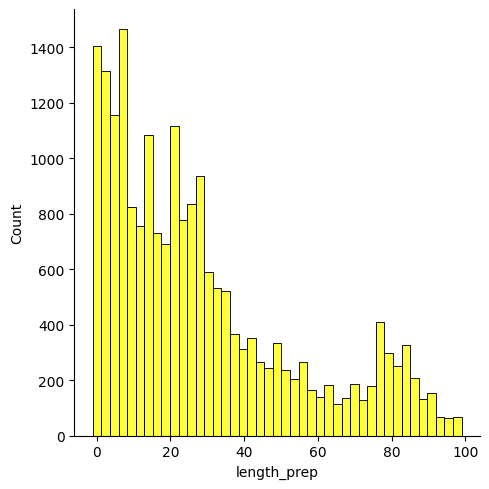

In [68]:
#Distribution of length_preperation of searches

#Percentage of dataset beyond 100 days
distribution = searchs_df["length_prep"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')

#Remove values beyond 100 days
distribution = distribution[distribution < 100]

#Distribution plot of length_preperation column
sns.displot(x=distribution, color = 'yellow')
plt.show()

100 days was chosen as the limit since only 14.06% of the dataset exists beyond that.

0.0 % 



AttributeError: module 'matplotlib' has no attribute 'show'

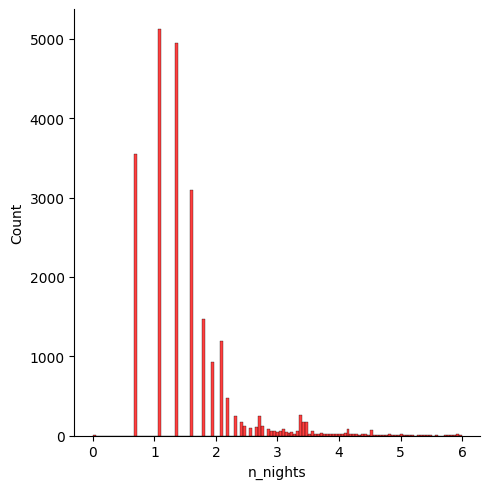

In [72]:
#Distribution of n_nights of searches

#Percentage of dataset beyond 20 nights
print(len(searchs_df[searchs_df['n_nights'] > 20])/len(searchs_df['n_nights'])*100, '% \n')

#Remove n_nights beyond 10 days
searches_within_twenty = searchs_df[searchs_df['n_nights'] < 10]

#Distribution plot of length_preperation column
sns.displot(searches_within_twenty, x='n_nights', color = 'red')
plt.show()

## Insight_2 
As we can see most guest preferred staying for 1 - 2.5 days on average while no guests booked the venue for more than 10 days

In [73]:
#Types of rooms searched for

searchs_df['filter_room_types'].unique()[0:15] #Display first 15 unique values

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

Most of the room types requested were entire home/apt and private rooms sometimes shared rooms. If given more time, I would have cleaned this column since most filter values are repeated within the same cell. On the Airbnb website, there are only 4 values in the type of place:

* Entire Place
* Private Room
* Hotel Room
* Shared Room

In [74]:
#Find top 15 countries where searches originate from

#Group by origin country and finding the count of each country
search_origin = searchs_df.groupby("origin_country").agg({'origin_country' : 'count'})
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending = False) #Sort count in descending order
search_origin.nlargest(15, 'count') #Find the 15 largest values

count
origin_country       
IE               6608
US               5811
GB               4832
FR               3444
IT               2333
DE               2170
ES               1759
CA               1085
AU                962
NL                843
BR                636
CH                535
BE                386
AT                320
RU                274

## Insight_3
Most of the searches were from Great Britain, USA,Ireland,France and Italy.

## Now moving on to Contact Dataset

In [76]:
contacts_df.head(5)

id_guest                               id_host  \
0  000dfad9-459b-4f0b-8310-3d6ab34e4f57  13bb24b8-d432-43a2-9755-5ea11b43bb69   
1  00197051-c6cb-4c3a-99e9-86615b819874  46aa3897-9c00-4d76-ac66-a307593d0675   
2  0027538e-aa9e-4a02-8979-b8397e5d4cba  6bbb88ca-db66-48c5-9c4b-862f7706284a   
3  0027538e-aa9e-4a02-8979-b8397e5d4cba  8772bc85-a9b7-4d85-a52d-41f3620c2912   
4  0027538e-aa9e-4a02-8979-b8397e5d4cba  ac162061-55e2-4072-ac91-2e080f9581f2   

                             id_listing          ts_contact_at  \
0  21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370  2014-10-04 16:26:28.0   
1  fb5ed09a-9848-4f2c-b2ef-34deb62164fb  2014-11-04 09:10:03.0   
2  d3871da6-8012-4dc4-b508-c91f2c10c297  2014-10-10 12:02:50.0   
3  0d9b5583-8053-4b67-adfe-8c29eb12efed  2014-10-10 15:23:53.0   
4  ec68e0af-b0f2-42c7-b6f8-d41061c083ff  2014-10-10 15:22:26.0   

             ts_reply_at         ts_accepted_at          ts_booking_at  \
0  2014-10-04 16:26:28.0  2014-10-04 16:26:28.0  2014-10-04 16:26:28.0   
1  2014-11-04 09:45:50.0  2014-11-04 09:45:50.0  2014-11-04 12:20:46.0   
2  2014-10-10 15:07:01.0                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4  2014-10-10 15:24:26.0  2014-10-10 15:24:26.0  2014-10-10 15:52:42.0   

   ds_checkin ds_checkout  n_guests  n_messages  
0  2014-10-13  2014-10-15         2          13  
1  2014-11-27  2014-11-30         1          10  
2  2014-10-17  2014-10-19         2           3  
3  2014-10-17  2014-10-19         2           2  
4  2014-10-17  2014-10-19         2          14

In [77]:
contacts_df.dtypes

id_guest          object
id_host           object
id_listing        object
ts_contact_at     object
ts_reply_at       object
ts_accepted_at    object
ts_booking_at     object
ds_checkin        object
ds_checkout       object
n_guests           int64
n_messages         int64
dtype: object

In [79]:
# Converting object type to datetime type for few features
contacts_df['ts_contact_at'] = pd.to_datetime(contacts_df['ts_contact_at']) 
contacts_df['ts_reply_at'] = pd.to_datetime(contacts_df['ts_reply_at']) 
contacts_df['ts_accepted_at'] = pd.to_datetime(contacts_df['ts_accepted_at'])
contacts_df['ds_checkin'] = pd.to_datetime(contacts_df['ds_checkin']) 
contacts_df['ds_checkout'] = pd.to_datetime(contacts_df['ds_checkout'])
contacts_df['ts_booking_at'] = pd.to_datetime(contacts_df['ts_booking_at']) 

In [81]:
contacts_df.dtypes

id_guest                  object
id_host                   object
id_listing                object
ts_contact_at     datetime64[ns]
ts_reply_at       datetime64[ns]
ts_accepted_at    datetime64[ns]
ts_booking_at     datetime64[ns]
ds_checkin        datetime64[ns]
ds_checkout       datetime64[ns]
n_guests                   int64
n_messages                 int64
dtype: object

In [82]:
# Find % of null values in datasets 
print('Contacts')
print(contacts_df.isna().sum()/len(contacts_df), '\n')


Contacts
id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64 



Missing value is not a problem for this dataset.

In [89]:
# Creating a new feature, Response rate which tells how fast guests were replied to.
contacts_df['response_rate']= contacts_df['ts_reply_at']- contacts_df['ts_contact_at']

# Finding the average response time
contacts_df['response_rate'].mean()

Timedelta('0 days 09:39:16.042111095')

## Insight_4 
So, the guests were responsed back within 10 hours of their intial query on average.

In [91]:
# Creating a new feature, Length of Stay which tells how long guests stayed at the host's house.
contacts_df['length_stay'] = contacts_df['ds_checkout'] - contacts_df['ds_checkin']

# Finding the average length of stay 
contacts_df['length_stay'].mean()

Timedelta('5 days 19:25:32.864629937')

## Insight_5 
On average the guests stay for 5-6 days.

In [92]:
contacts_df.describe()

ts_contact_at                    ts_reply_at  \
count                           7823                           7219   
mean   2014-10-10 11:59:33.640802816  2014-10-10 22:42:36.511982336   
min              2014-03-04 11:08:13            2014-04-18 09:39:06   
25%              2014-10-03 16:28:52            2014-10-03 23:07:32   
50%              2014-10-08 17:34:36            2014-10-09 00:16:21   
75%       2014-10-13 21:28:51.500000     2014-10-14 10:00:04.500000   
max              2015-02-02 08:45:18            2015-02-02 23:18:25   
std                              NaN                            NaN   

                      ts_accepted_at                  ts_booking_at  \
count                           3627                           2174   
mean   2014-10-11 14:07:07.993382912  2014-10-13 07:54:43.307267840   
min              2014-05-21 16:51:54            2014-05-21 16:51:54   
25%              2014-10-04 13:45:13            2014-10-05 13:53:46   
50%              2014-10-09 13:46:50            2014-10-10 11:15:13   
75%       2014-10-14 16:28:27.500000  2014-10-15 13:16:17.249999872   
max              2015-02-03 14:16:42            2015-01-21 16:16:29   
std                              NaN                            NaN   

                          ds_checkin                    ds_checkout  \
count                           7823                           7823   
mean   2014-11-16 09:47:00.452511744  2014-11-22 05:12:33.317141760   
min              2014-10-01 00:00:00            2014-10-02 00:00:00   
25%              2014-10-15 00:00:00            2014-10-19 00:00:00   
50%              2014-10-31 00:00:00            2014-11-06 00:00:00   
75%              2014-11-22 00:00:00            2014-11-30 00:00:00   
max              2015-10-24 00:00:00            2015-12-01 00:00:00   
std                              NaN                            NaN   

          n_guests   n_messages              response_rate  \
count  7823.000000  7823.000000                       7219   
mean      2.422600     6.319954  0 days 09:39:16.042111095   
min       1.000000     1.000000            0 days 00:00:00   
25%       1.000000     2.000000            0 days 00:15:20   
50%       2.000000     4.000000            0 days 01:42:34   
75%       3.000000     8.000000            0 days 09:04:02   
max      16.000000   102.000000           57 days 05:48:11   
std       1.617347     6.472827  1 days 11:16:52.040897238   

                      length_stay  
count                        7823  
mean    5 days 19:25:32.864629937  
min               1 days 00:00:00  
25%               2 days 00:00:00  
50%               3 days 00:00:00  
75%               5 days 00:00:00  
max             334 days 00:00:00  
std    14 days 23:45:24.447710564

In [93]:
#Conversion rate from accepting to booking

contacts_df['ts_booking_at'].count()/contacts_df['ts_accepted_at'].count()

0.5993934381031155

## Insight_6
41% is the rate of guests whose request for the venue is accepted but they didn't book the venue.

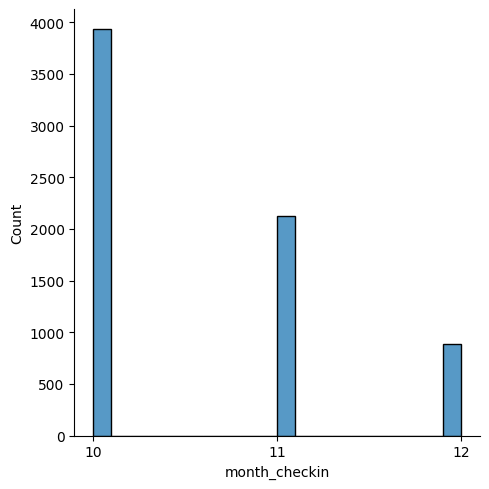

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

contacts_df['month_checkin'] = contacts_df['ds_checkin'].dt.month  # Extract month from check-in date
contacts_checkin = contacts_df[contacts_df['month_checkin'] > 9]  # Use only peak season months (Oct, Nov, Dec)

# Distribution of check-in among October, November, and December
sns.displot(contacts_checkin, x='month_checkin', multiple="dodge")

# Set x-axis ticks
plt.xticks([10, 11, 12])

# Show the plot
plt.show()


## Insight_7
October month from the whole year is the most busiest and most revenue generating month.


## All the insights from the analysis :
1. October month from the whole year is the most busiest and most revenue generating month.
2. 41% is the rate of guests whose request for the venue is accepted but they didn't book the venue.
3. On average the guests stay for 5-6 days.
4. The guests were responsed back within 10 hours of their intial query on average.
5. Most of the searches were from Great Britain, USA,Ireland,France and Italy.
6. As we can see most guest preferred staying for 1 - 2.5 days on average while no guests booked the venue for more than 10 days.
7. From the table we can say guests are looking for smaller accomdations as the n_guests_min & n_guests_max lies between 1 & 2 for 75% of the data points.

# Recommendations 

## 1. October is the Busiest Month:
**Recommendation:**

Capitalize on the popularity of October by running targeted marketing campaigns or promotions during this period to attract more guests. Consider offering special deals, discounts, or unique experiences to further enhance the appeal of accommodations during this high-demand month.

## 2. 41% Acceptance Rate but No Booking:
**Recommendation:**

Investigate the reasons behind the high acceptance rate coupled with no booking. Conduct surveys or gather feedback to understand if there are specific issues preventing guests from completing bookings. Addressing these issues can potentially convert more inquiries into actual bookings.

## 3. Average Guest Stay Duration of 5-6 Days:
**Recommendation:**

Promote longer stays by introducing packages or discounts for extended durations. Encourage hosts to provide amenities that cater to guests staying for an extended period. Highlight attractions and activities in the area that make longer stays appealing.

## 4. Quick Response Time within 10 Hours:
**Recommendation:**

Emphasize the importance of prompt communication to hosts. Provide resources and tools that enable hosts to respond quickly to guest inquiries. Consider implementing incentives or recognition programs for hosts with consistently fast response times.

## 5. Majority of Searches from Great Britain, USA, Ireland, France, and Italy:
**Recommendation:**

Tailor marketing strategies to target audiences from these specific countries. Consider localized promotions, partnerships with travel agencies, or collaborations with influencers in these regions to increase visibility and attract more guests.

## 6. Most Guests Prefer Stays of 1-2.5 Days, Few Book for Over 10 Days:
**Recommendation:**

Explore ways to encourage longer bookings, such as offering special rates for extended stays, creating packages that include local experiences for longer durations, or providing incentives for hosts who accommodate longer bookings.

## 7. Guests Prefer Smaller Accommodations (n_guests_min & n_guests_max between 1 & 2):
**Recommendation:**

Highlight the appeal of smaller accommodations by showcasing their coziness, personalized experiences, and potential cost savings. Encourage hosts to emphasize unique features that make smaller spaces comfortable and attractive to potential guests.
These recommendations aim to leverage the identified trends and patterns to optimize the Airbnb experience for both guests and hosts, ultimately increasing bookings and satisfaction levels.